# Small example showing linear regression

Plot of 200 random samples.

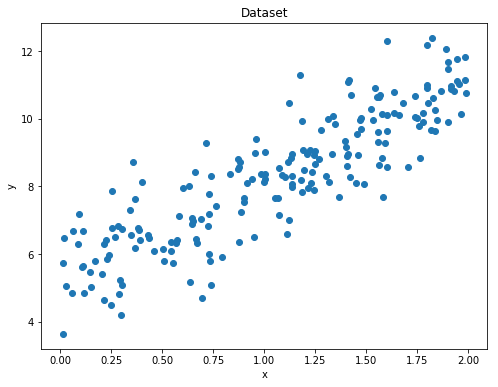

In [12]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1234)
X = 2 * np.random.rand(200, 1)
y = 5 + 3 * X + np.random.randn(200, 1)
fig = plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.title("Dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Next we have a basic Linear Regression class where we can train the regressor using gradient descent, or just by solving the normal equation.

In [13]:
class LinearRegression:
    def __init__(self, W=0, b=0):
        pass

    def errorfunction(self, X, y):
        """
        Returns the mean squared error (MSE)
        """
        n_samples, _ = X.shape
        prediction = np.dot(X, self.W) + self.b
        MSE = 1/(2 * n_samples) * np.dot((prediction-y).T, prediction-y)
        return float(MSE)

    def train_gradient_descent(self, X, y, learningrate=0.1, n_iterations=100):
        """
        Trains a linear regression model using gradient descent
        """
        costs = []
        n_samples, n_features = X.shape
        self.W = np.zeros(shape=(n_features, 1))
        self.b = 0
        for i in range(n_iterations):
            # calculating gradients, cost and prediction
            prediction = np.dot(X, self.W) + self.b
            grad_W = 1/n_samples * np.dot(X.T, prediction - y)
            grad_b = 1/n_samples * np.sum(prediction - y)
            cost = self.errorfunction(X, y)
            costs.append(cost)
            # print("MSE at iteration {i}: {MSE}".format(MSE=float(cost), i=i+1))
            # updating the weights and bias
            self.W = self.W - learningrate * grad_W
            self.b = self.b - learningrate * grad_b
        return self.W, self.b, costs

    def train_normal_equation(self, X, y):
        """
        Trains a linear regression model using the normal equation
        """
        self.W = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
        self.b = 0

Now we will train the regressor using gradient descent with fixed learning rate 0.1 and 200 iterations

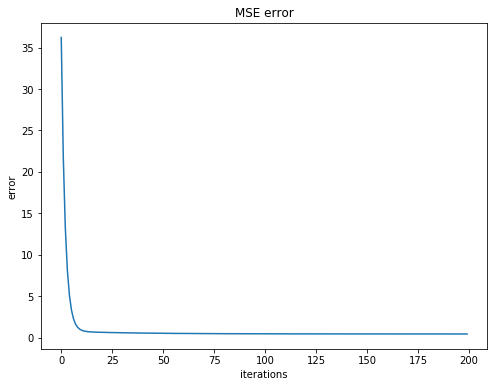

In [14]:
t = LinearRegression()
weights, bias, costs = t.train_gradient_descent(X, y, learningrate=0.1, n_iterations=200)
fig = plt.figure(figsize=(8, 6))
plt.title("MSE error")
plt.xlabel("iterations")
plt.ylabel("error")
plt.plot(np.arange(200),costs)
plt.show()


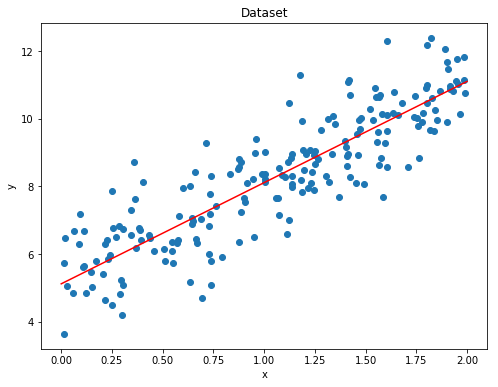

In [15]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.plot([0, 2], [float(t.W[:])*0 + t.b, float(t.W[:])*2 +t.b],'r')
plt.title("Dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.show()